In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import re
import numpy as np

In [333]:
directorio_de_imagenes="/Users/leonardoomarbolanosrivera/MAESTRIA/SEMESTRE3/MACHINE_LEARNING/repository/Proyecto_final/IMAGENES"

In [337]:
def graph_continues_types(df,colName,save_image_dir=None,save_image_file=None,image_dpi=300):
    fig,ax = plt.subplots(2,2,figsize=(8,6))
    fig.autofmt_xdate()
    sns.histplot(data=df,x=colName,kde=True,ax=ax[0,0]) #visualiza densidad de kernel
    sns.boxplot(x=df[colName],ax=ax[0,1],showmeans=True)
    sns.barplot(data=df, y=colName,err_kws={'color': 'orange'},ax=ax[1,0])
    sns.violinplot(x=df[colName],ax=ax[1,1]) # por defecto dibuja un boxplot en miniatura
    if save_image_dir!=None and save_image_file !=None:
        plt.savefig(f"{save_image_dir}/{save_image_file}_hist_box_bar_violing.jpg", dpi=image_dpi, transparent=False, bbox_inches='tight')

In [289]:
def getDataFrameValueCounts(data,columna,normalize=False):
    return data[columna].value_counts(normalize=normalize).to_frame().reset_index()

In [290]:
def agruparData_value_counts(data,columna,minimo_para_agrupar,fila_mensaje="Agrupacion",normalize=False):
    if normalize:
        count_col_name='proportion'
    else:
        count_col_name='count'
    agrupacion_count=data[(data[count_col_name]<minimo_para_agrupar)][count_col_name].sum()
    tmp_df = pd.DataFrame([[fila_mensaje,agrupacion_count]], columns=[columna,count_col_name])
    tmd_df=pd.concat([tmp_df, data[(data[count_col_name]>=minimo_para_agrupar)]])
    tmd_df=tmd_df.reset_index(drop=True)
    return tmd_df

In [338]:
def graf_conteo_de_valores(data,columna:str,xlabel=None,yLabel=None,title=None,orient='h',getValueCounts=True,normalize=False,return_value=False,save_image_dir=None,save_image_file=None,image_dpi=300):
    if getValueCounts:
        value_counts=getDataFrameValueCounts(data,columna,normalize)
    else:
        value_counts=data
    
    if normalize:
        count_col_name='proportion'
    else:
        count_col_name='count'

        
    ax=sns.barplot(x=count_col_name,hue=columna,y=columna,data=value_counts,orient = orient,palette='Set2',legend=False)
    if xlabel !=None:
        ax.set_xlabel(xlabel)
    if yLabel !=None:
        ax.set_ylabel(yLabel)
    if title !=None:
        ax.set_title(title)

    if save_image_dir!=None and save_image_file !=None:
        plt.savefig(f"{save_image_dir}/{save_image_file}_{count_col_name}.jpg", dpi=image_dpi, transparent=False, bbox_inches='tight')
    
    plt.show()
    if return_value:
        return value_counts

In [331]:
def graf_conteo_de_valores_grupados(data,columna,minimo_para_agrupar,fila_mensaje="Agrupacion",xlabel=None,yLabel=None,title=None,orient='h',normalize=False,return_value=False,save_image_dir=None,save_image_file=None,image_dpi=300):
    value_counts=agruparData_value_counts(getDataFrameValueCounts(data,columna,normalize),columna,minimo_para_agrupar,fila_mensaje,normalize=normalize)
    return graf_conteo_de_valores(value_counts,columna,xlabel,yLabel,title,orient,normalize=normalize,getValueCounts=False,return_value=return_value,save_image_dir=save_image_dir,save_image_file=save_image_file,image_dpi=image_dpi)
    

https://www.kaggle.com/datasets/andrewmvd/data-analyst-jobs
#


In [144]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/data-analyst-jobs")

print("Path to dataset files:", path)

Path to dataset files: /Users/leonardoomarbolanosrivera/.cache/kagglehub/datasets/andrewmvd/data-analyst-jobs/versions/1


In [145]:
os.listdir(path)

['DataAnalyst.csv']

In [146]:
# Reading data and removing index col
df = pd.read_csv(f"{path}/DataAnalyst.csv",index_col=0)

# Reading including index col
#df = pd.read_csv(f"{path}/DataScientist.csv")

# for error : UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 28126: invalid continuation byte

#df = pd.read_csv(f"{path}/Final.csv",encoding='latin-1')

In [147]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [148]:
df.shape

(2253, 15)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2253 entries, 0 to 2252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2253 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             2253 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2253 non-null   object 
 7   Size               2253 non-null   object 
 8   Founded            2253 non-null   int64  
 9   Type of ownership  2253 non-null   object 
 10  Industry           2253 non-null   object 
 11  Sector             2253 non-null   object 
 12  Revenue            2253 non-null   object 
 13  Competitors        2253 non-null   object 
 14  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 281.6+ KB


In [150]:
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [151]:

#df[(df['Job Title'].str.contains('Data'))]['Job Title'].value_counts()

# Job Title

In [152]:
df['Job Title'].value_counts()

Job Title
Data Analyst                        405
Senior Data Analyst                  90
Junior Data Analyst                  30
Business Data Analyst                28
Sr. Data Analyst                     21
                                   ... 
Data Analyst – Level II               1
Data Analyst/Programmer               1
Data Services Business Analyst 2      1
Call Center Data Analyst              1
Senior Quality Data Analyst           1
Name: count, Length: 1272, dtype: int64

# Salary Estimate
    - Separacion en Salario estimado Minimo y Maximo y  el average
    - Las nuevas Columnas: 
        - Salary Estimate Min: El valor del salario Minimo
        - Salary Estimate Max: El valor del salario Maximo
        - Salary Estimate Mean: (Salario Minimo + Maximo)/2
    - Estas nuevas columnas tendran valores inputados usando la media para valores desconocidos

In [153]:

df['Salary Estimate'].value_counts()

Salary Estimate
$42K-$76K (Glassdoor est.)    57
$41K-$78K (Glassdoor est.)    57
$50K-$86K (Glassdoor est.)    41
$35K-$67K (Glassdoor est.)    33
$43K-$76K (Glassdoor est.)    31
                              ..
$43K-$77K (Glassdoor est.)     3
$36K-$67K (Glassdoor est.)     3
$47K-$81K (Glassdoor est.)     3
$57K-$70K (Glassdoor est.)     2
-1                             1
Name: count, Length: 90, dtype: int64

### Creacion de columna Salary Estimate Min

In [154]:
pattern = re.compile(r"^\$(\d+)K")
def get_Salario_Min(x):
    if isinstance(x, str):
        matched= pattern.match(x)
        if matched:
            return(matched.group(1))
        else: 
            return -1
    return(x)

In [155]:
print(get_Salario_Min("$43K-$76K (Glassdoor est.)"))
print(get_Salario_Min("-1"))
print(get_Salario_Min(-1))

43
-1
-1


In [156]:
df['Salary Estimate Min']=df['Salary Estimate'].apply(get_Salario_Min).astype('float')

In [157]:
df['Salary Estimate Min'].describe()

count    2253.000000
mean       54.242344
std        19.605633
min        -1.000000
25%        41.000000
50%        50.000000
75%        64.000000
max       113.000000
Name: Salary Estimate Min, dtype: float64

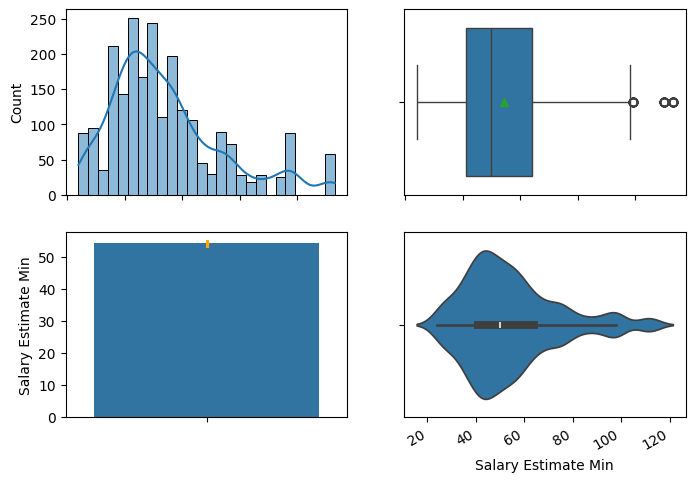

In [341]:
graph_continues_types(df,'Salary Estimate Min',save_image_dir=directorio_de_imagenes,save_image_file='Salary_Estimate_Min_1')

#### Obtenemos la media de el salario minimo

In [159]:
Salary_Estimate_Min_mean=df[(df['Salary Estimate Min']!=-1)]['Salary Estimate Min'].mean()
Salary_Estimate_Min_mean

54.26687388987567

In [160]:
def set_Salary_Estimate_Min_mean(x):
    if x <= 0:
        return Salary_Estimate_Min_mean
    else:
        return x

In [161]:
print (set_Salary_Estimate_Min_mean(-1.0))
print (set_Salary_Estimate_Min_mean(-1))
print (set_Salary_Estimate_Min_mean(1))

54.26687388987567
54.26687388987567
1


In [162]:
df['Salary Estimate Min']=df['Salary Estimate Min'].apply(set_Salary_Estimate_Min_mean).astype('float')

In [163]:
df['Salary Estimate Min'].describe()

count    2253.000000
mean       54.266874
std        19.571028
min        24.000000
25%        41.000000
50%        50.000000
75%        64.000000
max       113.000000
Name: Salary Estimate Min, dtype: float64

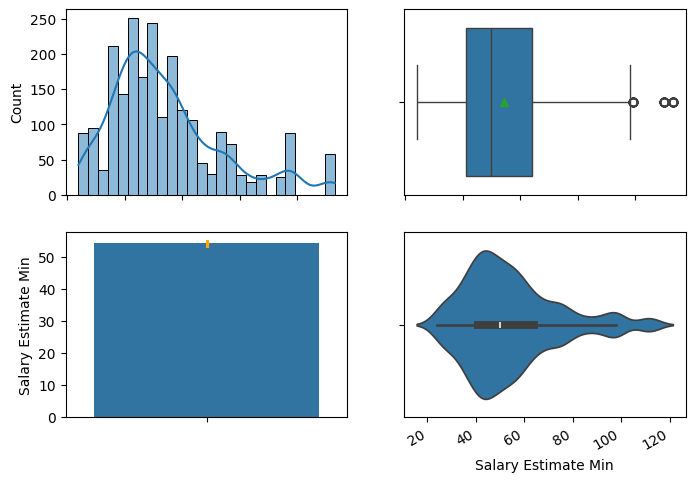

In [340]:
graph_continues_types(df,'Salary Estimate Min',save_image_dir=directorio_de_imagenes,save_image_file="Salary_Estimate_Min_2")

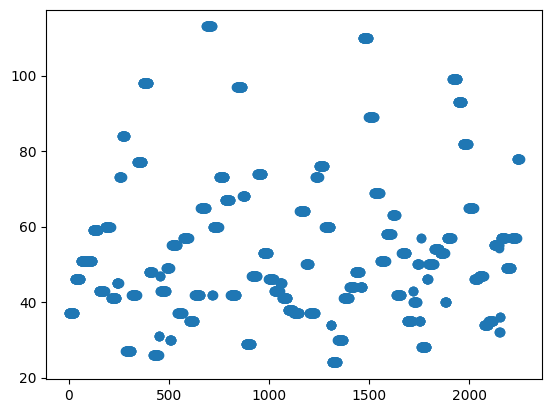

In [165]:
# Generar coordenadas x para ver el salario
x_cord=np.arange(0,df.shape[0],1)
plt.scatter(x_cord,df['Salary Estimate Min'])

### Creacion de columna Salary Estimate Max

In [166]:
pattern = re.compile(r"\$\d+K-\$(\d+)K")
def get_Salario_Max(x):
    if isinstance(x, str):
        matched= pattern.match(x)
        if matched:
            return(matched.group(1))
        else: 
            return -1
    return(x)

In [167]:
print(get_Salario_Max("$43K-$76K (Glassdoor est.)"))
print(get_Salario_Max("-1"))
print(get_Salario_Max(-1))

76
-1
-1


In [168]:
df['Salary Estimate Max']=df['Salary Estimate'].apply(get_Salario_Max).astype('float')

In [169]:
df['Salary Estimate Max'].describe()

count    2253.000000
mean       89.938748
std        29.371703
min        -1.000000
25%        70.000000
50%        87.000000
75%       104.000000
max       190.000000
Name: Salary Estimate Max, dtype: float64

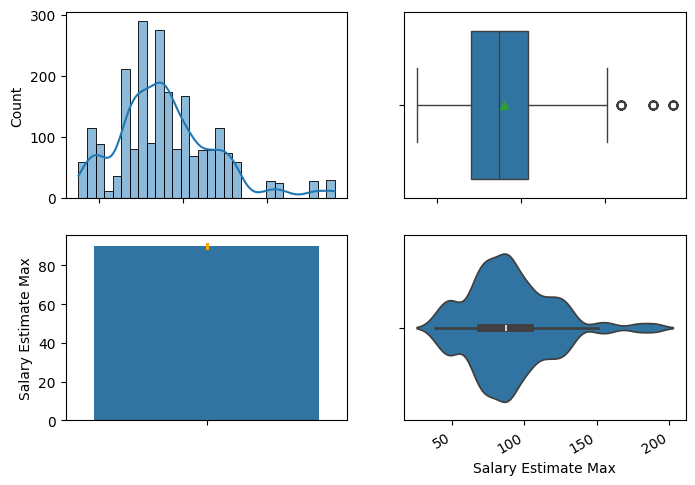

In [342]:
graph_continues_types(df,'Salary Estimate Max',save_image_dir=directorio_de_imagenes,save_image_file='Salary_Estimate_Max_1')

#### Obtenemos la media de el salario 

In [171]:
Salary_Estimate_Max_mean=df[(df['Salary Estimate Max']!=-1)]['Salary Estimate Max'].mean()
Salary_Estimate_Max_mean

89.9791296625222

In [172]:
def set_Salary_Estimate_Max_mean(x):
    if x <= 0:
        return Salary_Estimate_Max_mean
    else:
        return x

In [173]:
print (set_Salary_Estimate_Max_mean(-1.0))
print (set_Salary_Estimate_Max_mean(-1))
print (set_Salary_Estimate_Max_mean(1))

89.9791296625222
89.9791296625222
1


In [174]:
df['Salary Estimate Max']=df['Salary Estimate Max'].apply(set_Salary_Estimate_Max_mean).astype('float')

In [175]:
df['Salary Estimate Max'].describe()

count    2253.000000
mean       89.979130
std        29.309096
min        38.000000
25%        70.000000
50%        87.000000
75%       104.000000
max       190.000000
Name: Salary Estimate Max, dtype: float64

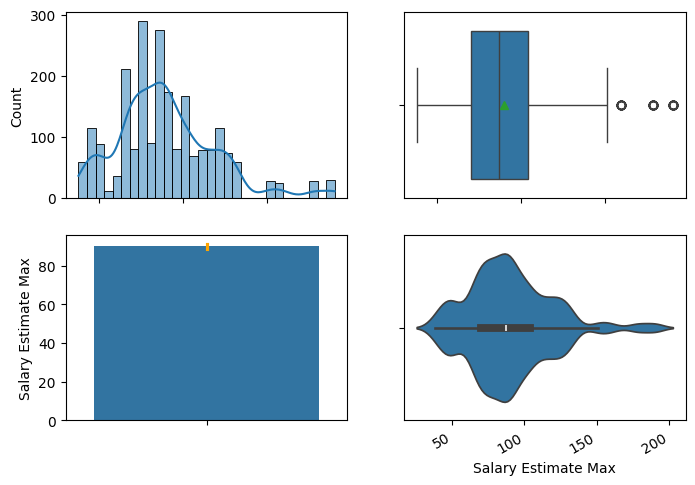

In [344]:
graph_continues_types(df,'Salary Estimate Max',save_image_dir=directorio_de_imagenes,save_image_file='Salary_Estimate_Max_2')

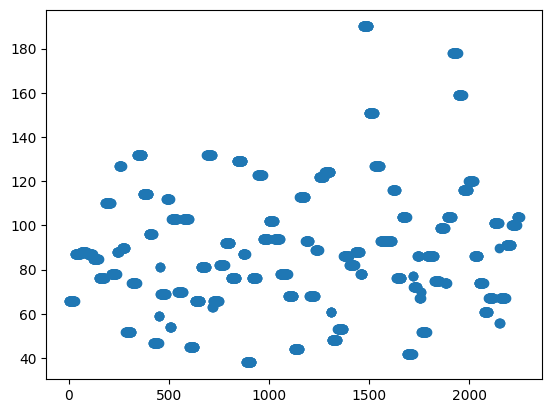

In [177]:
# Generar coordenadas x para ver el salario
x_cord=np.arange(0,df.shape[0],1)
plt.scatter(x_cord,df['Salary Estimate Max'])

### Creacion de columna Salary Estimate Mean

In [178]:
def get_mean_Mix_Max_Por_columna(min,max):
    return (min + max)/2

In [179]:
# pasamos 2 columnas y hacemos la operacion axis=1 es requerido o si no el valor resultante es un valor unico
df['Salary Estimate Mean']=df[['Salary Estimate Min','Salary Estimate Max']].apply(lambda x: get_mean_Mix_Max_Por_columna(x['Salary Estimate Min'],x['Salary Estimate Max']),axis=1).astype('float')

In [180]:
df['Salary Estimate Mean'].describe()

count    2253.000000
mean       72.123002
std        23.595493
min        33.500000
25%        58.000000
50%        69.000000
75%        80.500000
max       150.000000
Name: Salary Estimate Mean, dtype: float64

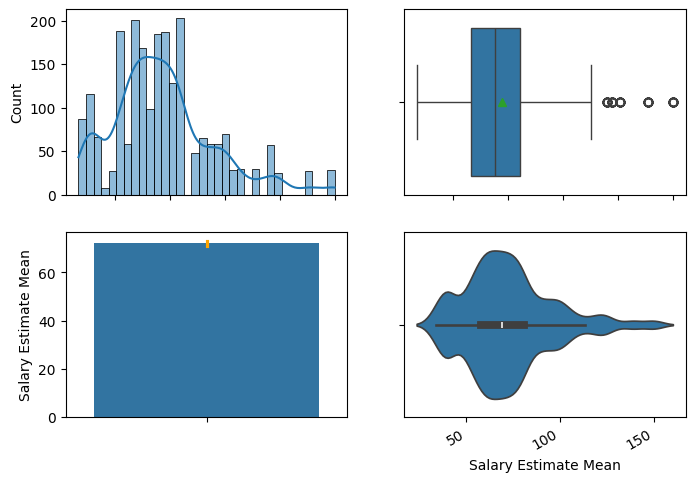

In [345]:
graph_continues_types(df,'Salary Estimate Mean',save_image_dir=directorio_de_imagenes,save_image_file='Salary_Estimate_Mean_1')

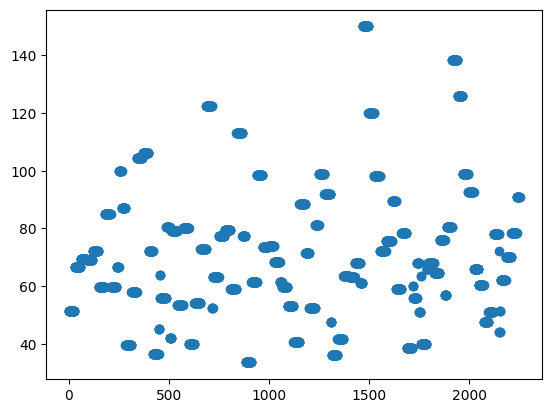

In [182]:
# Generar coordenadas x para ver el salario
x_cord=np.arange(0,df.shape[0],1)
plt.scatter(x_cord,df['Salary Estimate Mean'])

# Job Description

In [183]:
df['Job Description'].head()

0    Are you eager to roll up your sleeves and harn...
1    Overview\n\nProvides analytical and technical ...
2    We’re looking for a Senior Data Analyst who ha...
3    Requisition NumberRR-0001939\nRemote:Yes\nWe c...
4    ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...
Name: Job Description, dtype: object

# Rating
- Existen varios valores de -1 que son a los que no se les dia un ranking. Se imputara con el average para remplazar esos valores

In [184]:
df['Rating'].value_counts()

Rating
-1.0    272
 3.9    140
 3.6    135
 3.7    132
 5.0    131
 3.8    130
 4.0    129
 3.5    125
 4.1    119
 3.3    109
 3.4    101
 3.2     91
 3.1     68
 3.0     57
 4.3     55
 4.2     47
 4.5     47
 4.6     46
 4.4     46
 2.8     43
 2.9     40
 2.5     32
 4.8     29
 2.7     25
 4.7     23
 4.9     17
 2.6     14
 1.0     10
 2.4     10
 2.3      9
 2.0      6
 2.1      4
 2.2      3
 1.7      2
 1.8      2
 1.6      2
 1.9      2
Name: count, dtype: int64

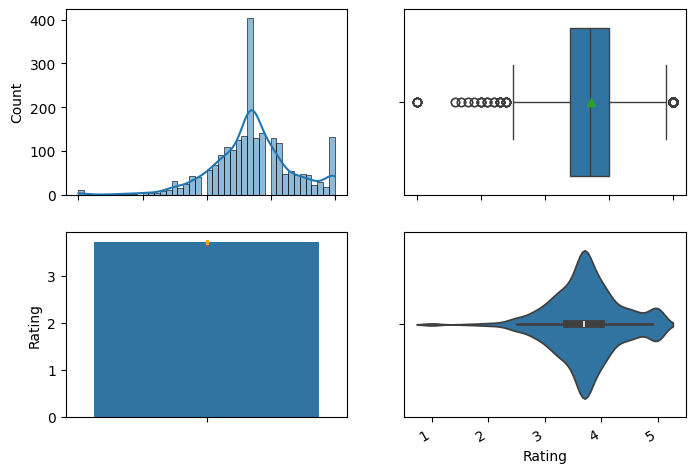

In [346]:
graph_continues_types(df,'Rating',save_image_dir=directorio_de_imagenes,save_image_file='Rating_1')

In [186]:
Rating_mean=df[(df['Rating']!=-1)]['Rating'].mean()
Rating_mean=Rating_mean.round(1)
Rating_mean

3.7

In [187]:
def set_Rating_mean(x):
    if x <= 0:
        return Rating_mean
    else:
        return x
    
print (set_Rating_mean(-1.0))
print (set_Rating_mean(-1))
print (set_Rating_mean(1)) 

3.7
3.7
1


In [188]:
df['Rating']=df['Rating'].apply(set_Rating_mean).astype('float')

In [189]:
df['Rating'].describe()

count    2253.000000
mean        3.728051
std         0.628634
min         1.000000
25%         3.400000
50%         3.700000
75%         4.000000
max         5.000000
Name: Rating, dtype: float64

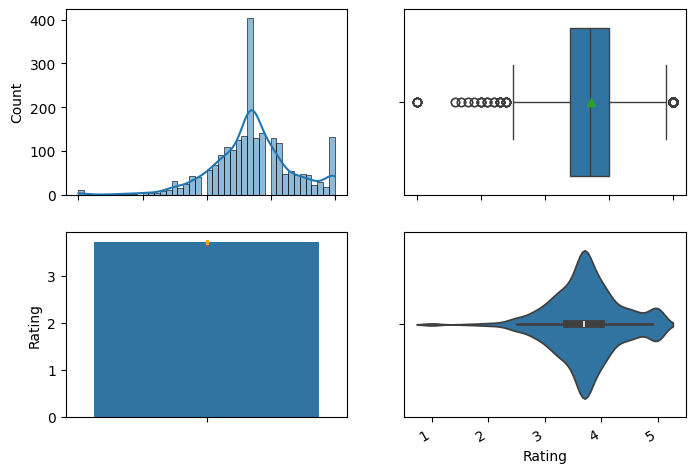

In [347]:
graph_continues_types(df,'Rating',save_image_dir=directorio_de_imagenes,save_image_file='Rating_2')

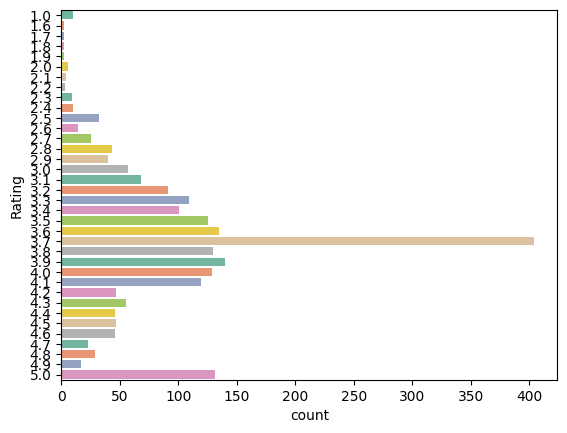

In [348]:
graf_conteo_de_valores(df,'Rating',save_image_dir=directorio_de_imagenes,save_image_file='Rating_1')

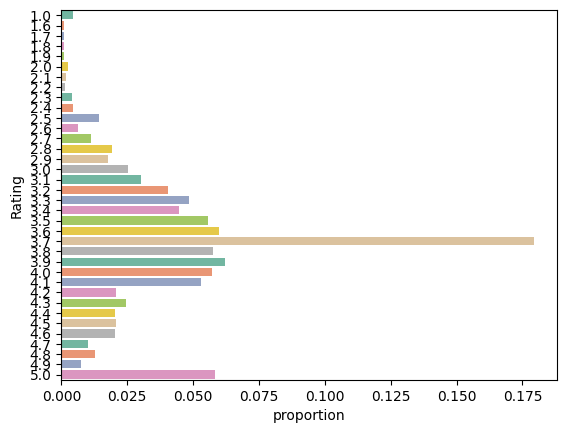

In [349]:
graf_conteo_de_valores(df,'Rating',save_image_dir=directorio_de_imagenes,save_image_file='Rating_1',normalize=True)

# Company name
- es el unico campo que tiene nulos
    - Es solo el nombre de una compañia
- Tambien los nombres de la compañia tienen un dato adjunto que no deberia estar ahi.
    - Ejemplo: Empire Today\n3.7

In [192]:
df['Company Name'].isnull().sum()

1

In [193]:
df[(df['Company Name'].isnull())]['Job Description']

1860    Kindred at Home, part of the Kindred at Home f...
Name: Job Description, dtype: object

In [194]:
df[(df['Job Title'].str.contains('Kindred'))]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Estimate Min,Salary Estimate Max,Salary Estimate Mean


In [195]:
df.loc[df['Company Name'].isnull(), 'Company Name'] = 'Kindred at Home'

In [196]:
df.loc[df['Company Name'].isnull()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Estimate Min,Salary Estimate Max,Salary Estimate Mean


In [197]:
df['Company Name'].isnull().sum()

0

In [198]:
df['Company Name'].value_counts()

Company Name
Staffigo Technical Services, LLC\n5.0        58
Diverse Lynx\n3.9                            22
Kforce\n4.1                                  19
Lorven Technologies Inc\n4.0                 19
Robert Half\n3.5                             14
                                             ..
El Hogar del Nino - The Home of the Child     1
Empire Today\n3.7                             1
Numerator\n3.9                                1
BDP International\n3.0                        1
SCL Health\n3.4                               1
Name: count, Length: 1514, dtype: int64

In [199]:
pattern = re.compile(r"\n[\d\\.]+$")
def clean_companyName(x):
    if isinstance(x, str):
        return(pattern.sub("", x))
    return(x)

clean_companyName("Staffigo Technical Services, LLC\n5.0")

'Staffigo Technical Services, LLC'

In [200]:
df['Company Name']=df['Company Name'].apply(clean_companyName)

In [201]:
df['Company Name'].value_counts()

Company Name
Staffigo Technical Services, LLC             58
Diverse Lynx                                 22
Kforce                                       19
Lorven Technologies Inc                      19
Mondo                                        14
                                             ..
Fast Switch, LTD                              1
El Hogar del Nino - The Home of the Child     1
Empire Today                                  1
Numerator                                     1
SCL Health                                    1
Name: count, Length: 1502, dtype: int64

# Location

In [202]:
df['Location'].value_counts()

Location
New York, NY         310
Chicago, IL          130
San Francisco, CA    119
Austin, TX            81
Los Angeles, CA       80
                    ... 
Carrollton, TX         1
Tarrant, TX            1
Addison, TX            1
Burr Ridge, IL         1
Littleton, CO          1
Name: count, Length: 253, dtype: int64

# Headquarters
- En el caso de esta variable hay algunos faltantes. Que se pueden llenar con la Localizacion

In [203]:
df['Headquarters'].value_counts()

Headquarters
New York, NY           206
-1                     172
San Francisco, CA       71
Chicago, IL             66
Woodridge, IL           58
                      ... 
Vaughan, Canada          1
Morrisville, NC          1
West Jordan, UT          1
South Salt Lake, UT      1
Broomfield, CO           1
Name: count, Length: 483, dtype: int64

In [204]:
df[(df['Headquarters']=='-1')].head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Estimate Min,Salary Estimate Max,Salary Estimate Mean
11,Data Analyst,$37K-$66K (Glassdoor est.),BulbHead is currently seeking a Data Analyst t...,3.7,BulbHead,"Fairfield, NJ",-1,1 to 50 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,-1,37.0,66.0,51.5
34,Data Analyst (Games),$46K-$87K (Glassdoor est.),Carry1st is the leading mobile game publisher ...,3.7,Carry1st,"New York, NY",-1,-1,-1,-1,-1,-1,-1,-1,-1,46.0,87.0,66.5
55,Data Reporting Analyst,$46K-$87K (Glassdoor est.),OverviewThe Data Analyst is a new position in ...,3.7,NADAP NYS INC.,"New York, NY",-1,-1,-1,-1,-1,-1,-1,-1,-1,46.0,87.0,66.5
68,Data Science Analyst,$51K-$88K (Glassdoor est.),Job Details\n\nLevel\n\nExperienced\n\nJob Loc...,3.7,Greater New York Mutual Insurance Companies (GNY),"New York, NY",-1,-1,-1,-1,-1,-1,-1,-1,-1,51.0,88.0,69.5
90,Data Analyst,$51K-$87K (Glassdoor est.),NYU Grossman School of Medicine is one of the ...,3.7,NYU Langone Medical Center,"New York, NY",-1,-1,-1,-1,-1,-1,-1,-1,-1,51.0,87.0,69.0


In [205]:
def add_Headquarters(headquarters,location):
    if headquarters == "-1":
        return location
    else:
        return headquarters
        

In [206]:
# pasamos 2 columnas y hacemos la operacion, axis=1 es requerido o si no el valor resultante es un valor unico
df['Headquarters']=df[['Headquarters','Location']].apply(lambda x: add_Headquarters(x['Headquarters'],x['Location']),axis=1)

In [207]:
df[(df['Headquarters']=='-1')].head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Estimate Min,Salary Estimate Max,Salary Estimate Mean


In [208]:
df['Headquarters'].value_counts()

Headquarters
New York, NY         224
San Francisco, CA     78
Chicago, IL           77
Woodridge, IL         58
Los Angeles, CA       56
                    ... 
Burr Ridge, IL         1
Saint Paul, MN         1
Oak Brook, IL          1
Bridgeview, IL         1
Broomfield, CO         1
Name: count, Length: 498, dtype: int64

# Size

In [209]:
df['Size'].value_counts()

Size
51 to 200 employees        421
10000+ employees           375
1001 to 5000 employees     348
1 to 50 employees          347
201 to 500 employees       249
501 to 1000 employees      211
-1                         163
5001 to 10000 employees     97
Unknown                     42
Name: count, dtype: int64

In [210]:
df.loc[(df['Size']=="-1"), 'Size']

34      -1
55      -1
68      -1
90      -1
109     -1
        ..
2200    -1
2202    -1
2239    -1
2246    -1
2250    -1
Name: Size, Length: 163, dtype: object

In [211]:
df.loc[(df['Size']=="-1"), 'Size']='Unknown'

In [212]:
df['Size'].value_counts()

Size
51 to 200 employees        421
10000+ employees           375
1001 to 5000 employees     348
1 to 50 employees          347
201 to 500 employees       249
501 to 1000 employees      211
Unknown                    205
5001 to 10000 employees     97
Name: count, dtype: int64

In [213]:
Size_value_counts=df['Size'].value_counts().to_frame().reset_index()
Size_value_counts

,Size,count
0,51 to 200 employees,421
1,10000+ employees,375
2,1001 to 5000 employees,348
3,1 to 50 employees,347
4,201 to 500 employees,249
5,501 to 1000 employees,211
6,Unknown,205
7,5001 to 10000 employees,97


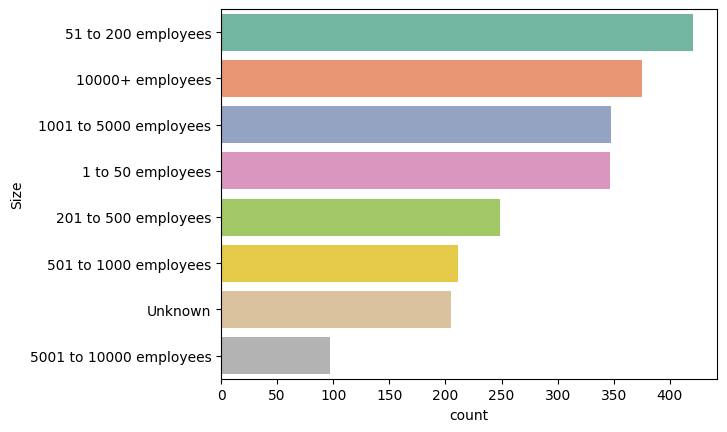

In [350]:
graf_conteo_de_valores(df,'Size',save_image_dir=directorio_de_imagenes,save_image_file='Size_1')

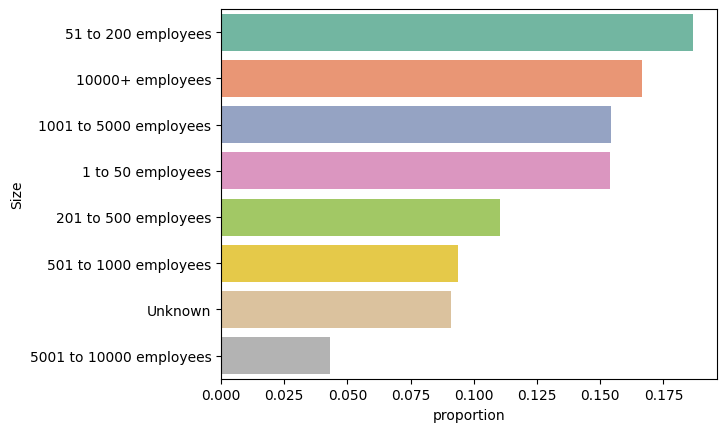

In [352]:
graf_conteo_de_valores(df,'Size',normalize=True,save_image_dir=directorio_de_imagenes,save_image_file='Size_1')

# Founded
- La columna tiene valores faltante y se imputo con mediana dado que los datos son años.

In [215]:

df['Founded'].value_counts()

Founded
-1       660
 2008     80
 2000     54
 2002     54
 1996     54
        ... 
 1958      1
 1885      1
 1922      1
 1830      1
 1898      1
Name: count, Length: 161, dtype: int64

In [216]:
df['Founded'].describe()

count    2253.000000
mean     1398.522858
std       901.929251
min        -1.000000
25%        -1.000000
50%      1979.000000
75%      2002.000000
max      2019.000000
Name: Founded, dtype: float64

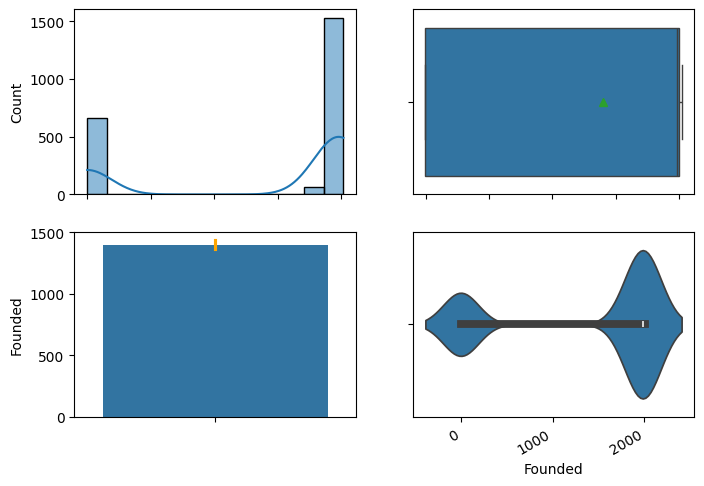

In [217]:
graph_continues_types(df,'Founded')
    

In [218]:
Founded_median=df['Founded'].median()
Founded_median


1979.0

In [219]:
df.loc[(df['Founded']==-1.0), 'Founded']

11     -1
15     -1
21     -1
23     -1
24     -1
       ..
2244   -1
2246   -1
2247   -1
2248   -1
2250   -1
Name: Founded, Length: 660, dtype: int64

In [220]:
df.loc[(df['Founded']==-1.0), 'Founded']=Founded_median

In [221]:
df['Founded'].describe()

count    2253.00000
mean     1978.54949
std        40.20953
min      1682.00000
25%      1979.00000
50%      1979.00000
75%      2002.00000
max      2019.00000
Name: Founded, dtype: float64

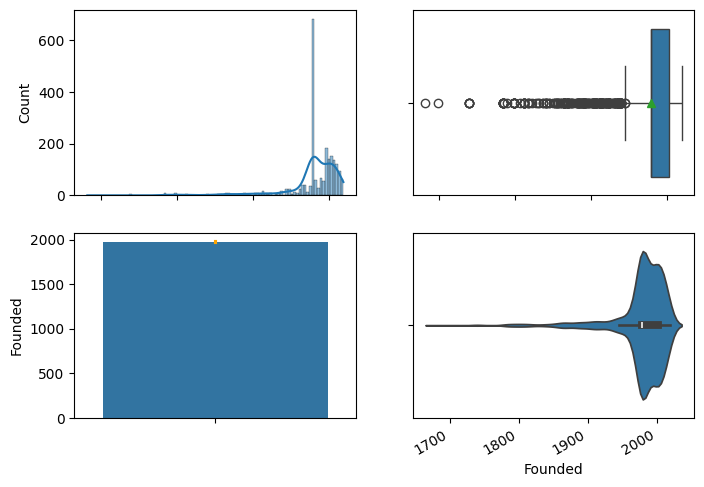

In [222]:
graph_continues_types(df,'Founded')

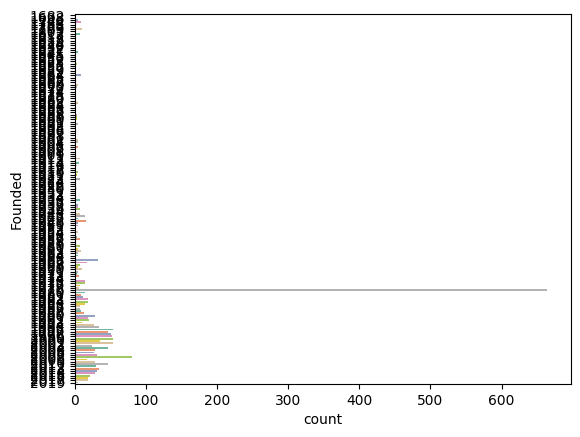

In [223]:
graf_conteo_de_valores(df,'Founded')

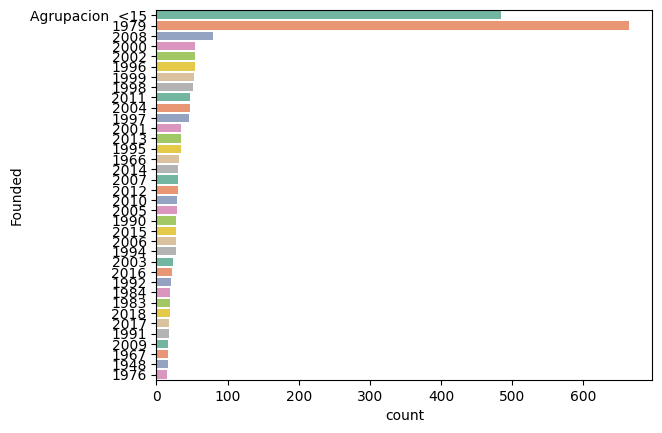

In [224]:
graf_conteo_de_valores_grupados(df,'Founded',15,"Agrupacion  <15")

In [225]:
df[(df["Founded"]==1979)].head(20)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Estimate Min,Salary Estimate Max,Salary Estimate Mean
11,Data Analyst,$37K-$66K (Glassdoor est.),BulbHead is currently seeking a Data Analyst t...,3.7,BulbHead,"Fairfield, NJ","Fairfield, NJ",1 to 50 employees,1979,Company - Private,-1,-1,Unknown / Non-Applicable,-1,-1,37.0,66.0,51.5
15,Sustainability Data Analyst,$37K-$66K (Glassdoor est.),Job Description\nRole Description\n\nSustainab...,3.6,CodeGreen Solutions,"New York, NY","New York, NY",1 to 50 employees,1979,Company - Private,Building & Personnel Services,Business Services,Unknown / Non-Applicable,-1,-1,37.0,66.0,51.5
21,Data Science Analyst,$37K-$66K (Glassdoor est.),"Job Description\nOur client, a music streaming...",3.7,MUSIC & Entertainment,"New York, NY","Marina del Rey, CA",Unknown,1979,Company - Public,-1,-1,Unknown / Non-Applicable,-1,-1,37.0,66.0,51.5
23,Data Analyst,$37K-$66K (Glassdoor est.),Haven Life is an insurtech innovator at MassMu...,3.5,Andiamo,"New York, NY","Warren, MI",201 to 500 employees,1979,Company - Private,Casual Restaurants,"Restaurants, Bars & Food Services",$1 to $5 million (USD),-1,-1,37.0,66.0,51.5
24,Entry Level / Jr. Data Analyst,$37K-$66K (Glassdoor est.),Dash Technologies is an industry leading softw...,3.8,Dash Technologies Inc,"New York, NY","Columbus, OH",1 to 50 employees,1979,Unknown,-1,-1,Unknown / Non-Applicable,-1,-1,37.0,66.0,51.5
25,Data Analyst,$37K-$66K (Glassdoor est.),Data Analyst (Decision Science)\n\nHearst is a...,4.0,Hearst Communications,"New York, NY","San Francisco, CA",1 to 50 employees,1979,Company - Private,Advertising & Marketing,Business Services,Less than $1 million (USD),-1,-1,37.0,66.0,51.5
28,Data Analyst Entry Level,$37K-$66K (Glassdoor est.),Type: Paid Intern (in a farm team)\n\nFunction...,3.7,Endai,"New York, NY","New York, NY",1 to 50 employees,1979,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1,-1,37.0,66.0,51.5
29,Data Analyst,$37K-$66K (Glassdoor est.),The Company\n\nBlueLabs is a leading provider ...,4.7,BlueLabs,"New York, NY","Washington, DC",1 to 50 employees,1979,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,-1,-1,37.0,66.0,51.5
31,Data Analyst,$46K-$87K (Glassdoor est.),"Data Analyst Jersey City, NJ 12+ months contra...",3.6,NALLAS CORPORATION,"Jersey City, NJ","Newtown, PA",1 to 50 employees,1979,Company - Private,Enterprise Software & Network Solutions,Information Technology,$1 to $5 million (USD),-1,-1,46.0,87.0,66.5
32,Data Analyst,$46K-$87K (Glassdoor est.),Job Description:\nLegal experience is required...,3.5,Pozent,"New York, NY","Piscataway, NJ",1 to 50 employees,1979,Contract,-1,-1,Less than $1 million (USD),-1,-1,46.0,87.0,66.5


# Type of ownership

In [226]:
df['Type of ownership'].value_counts()

Type of ownership
Company - Private                 1273
Company - Public                   452
-1                                 163
Nonprofit Organization             124
Subsidiary or Business Segment      89
Government                          37
College / University                34
Hospital                            19
Unknown                             16
Other Organization                  13
Contract                            11
School / School District             9
Private Practice / Firm              9
Self-employed                        2
Franchise                            2
Name: count, dtype: int64

In [227]:
df.loc[(df['Type of ownership']=="-1"), 'Type of ownership']

34      -1
55      -1
68      -1
90      -1
109     -1
        ..
2200    -1
2202    -1
2239    -1
2246    -1
2250    -1
Name: Type of ownership, Length: 163, dtype: object

In [228]:
df.loc[(df['Type of ownership']=="-1"), 'Type of ownership']='Unknown'

In [229]:
df['Type of ownership'].value_counts()

Type of ownership
Company - Private                 1273
Company - Public                   452
Unknown                            179
Nonprofit Organization             124
Subsidiary or Business Segment      89
Government                          37
College / University                34
Hospital                            19
Other Organization                  13
Contract                            11
School / School District             9
Private Practice / Firm              9
Self-employed                        2
Franchise                            2
Name: count, dtype: int64

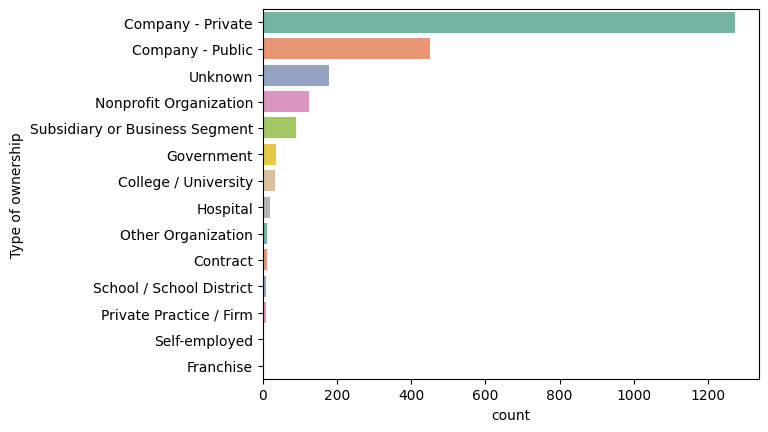

In [353]:
graf_conteo_de_valores(df,'Type of ownership',save_image_dir=directorio_de_imagenes,save_image_file='Type_of_ownership_1')

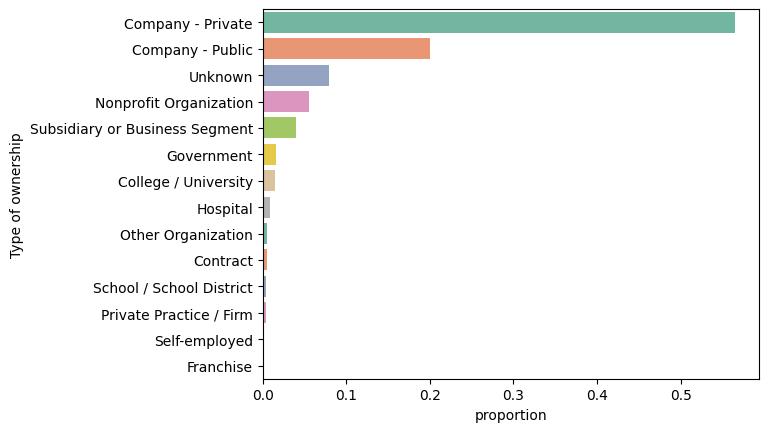

In [354]:
graf_conteo_de_valores(df,'Type of ownership',normalize=True,save_image_dir=directorio_de_imagenes,save_image_file='Type_of_ownership_1')

# Industry

In [231]:
df['Industry'].value_counts()

Industry
-1                                  353
IT Services                         325
Staffing & Outsourcing              323
Health Care Services & Hospitals    151
Computer Hardware & Software        111
                                   ... 
Express Delivery Services             1
Truck Rental & Leasing                1
Sporting Goods Stores                 1
Chemical Manufacturing                1
Hotels, Motels, & Resorts             1
Name: count, Length: 89, dtype: int64

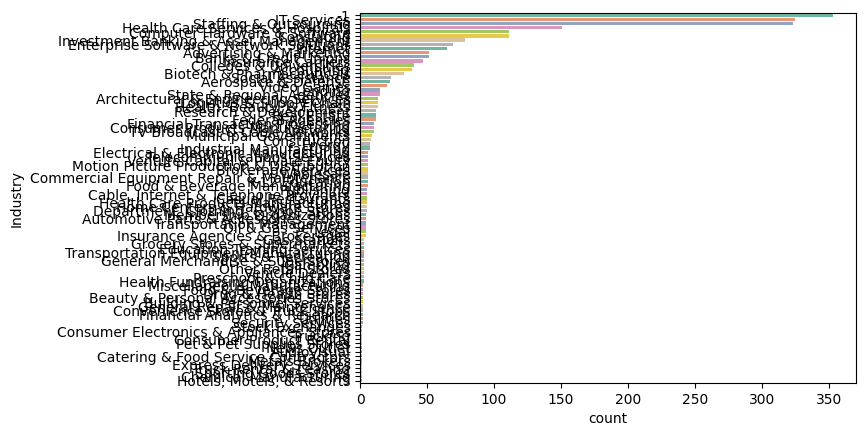

In [232]:
graf_conteo_de_valores(df,'Industry')

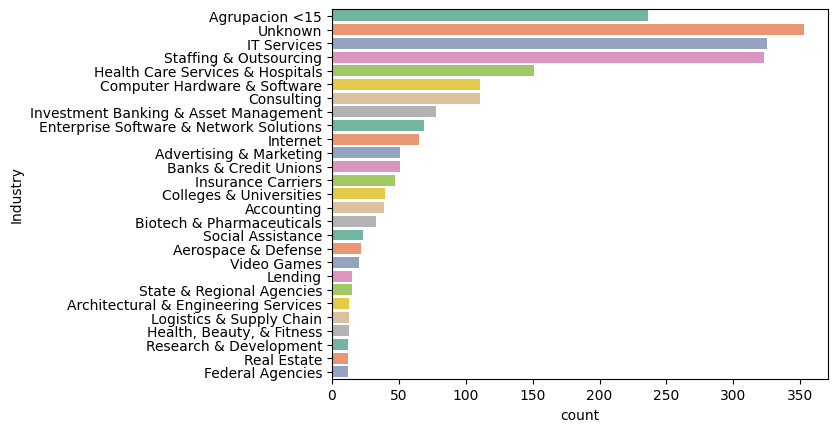

In [355]:
result=graf_conteo_de_valores_grupados(df,'Industry',12,"Agrupacion <15",return_value=True,save_image_dir=directorio_de_imagenes,save_image_file='Industry_1')

In [323]:
#result

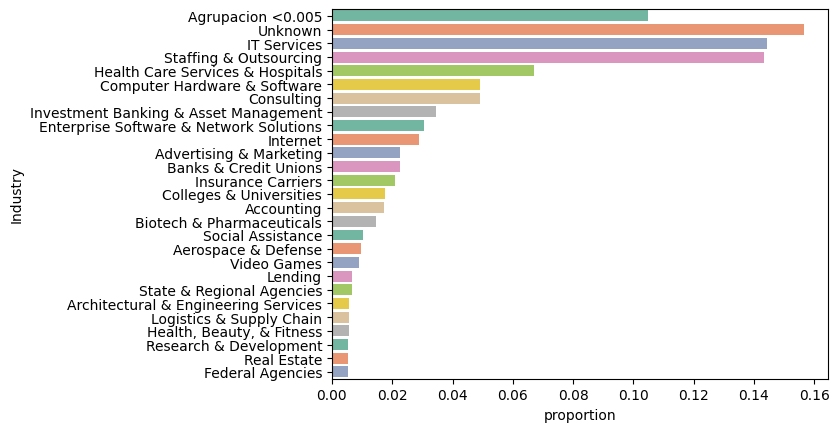

In [356]:
graf_conteo_de_valores_grupados(df,'Industry',0.005,"Agrupacion <0.005",normalize=True,save_image_dir=directorio_de_imagenes,save_image_file='Industry_1')

In [234]:
df.loc[(df['Industry']=="-1"), 'Industry']

11      -1
21      -1
24      -1
32      -1
34      -1
        ..
2220    -1
2234    -1
2239    -1
2246    -1
2250    -1
Name: Industry, Length: 353, dtype: object

In [235]:
df.loc[(df['Industry'].str.contains("Unknown")), 'Industry']

Series([], Name: Industry, dtype: object)

In [236]:
df.loc[(df['Industry']=="-1"), 'Industry']='Unknown'

In [237]:
df['Industry'].value_counts()

Industry
Unknown                             353
IT Services                         325
Staffing & Outsourcing              323
Health Care Services & Hospitals    151
Computer Hardware & Software        111
                                   ... 
Express Delivery Services             1
Truck Rental & Leasing                1
Sporting Goods Stores                 1
Chemical Manufacturing                1
Hotels, Motels, & Resorts             1
Name: count, Length: 89, dtype: int64

# Sector

In [238]:
df['Sector'].value_counts()

Sector
Information Technology                570
Business Services                     524
-1                                    353
Finance                               169
Health Care                           151
Education                              52
Insurance                              51
Accounting & Legal                     43
Media                                  42
Manufacturing                          40
Retail                                 38
Government                             36
Biotech & Pharmaceuticals              33
Non-Profit                             26
Aerospace & Defense                    22
Transportation & Logistics             20
Construction, Repair & Maintenance     16
Consumer Services                      14
Oil, Gas, Energy & Utilities           13
Real Estate                            12
Telecommunications                     11
Restaurants, Bars & Food Services       8
Arts, Entertainment & Recreation        7
Mining & Metals            

In [239]:
df.loc[(df['Sector']=="-1"), 'Sector']

11      -1
21      -1
24      -1
32      -1
34      -1
        ..
2220    -1
2234    -1
2239    -1
2246    -1
2250    -1
Name: Sector, Length: 353, dtype: object

In [240]:
df.loc[(df['Sector'].str.contains("Sector")), 'Sector']

Series([], Name: Sector, dtype: object)

In [241]:
df.loc[(df['Sector']=="-1"), 'Sector']='Unknown'

In [242]:
df['Sector'].value_counts()

Sector
Information Technology                570
Business Services                     524
Unknown                               353
Finance                               169
Health Care                           151
Education                              52
Insurance                              51
Accounting & Legal                     43
Media                                  42
Manufacturing                          40
Retail                                 38
Government                             36
Biotech & Pharmaceuticals              33
Non-Profit                             26
Aerospace & Defense                    22
Transportation & Logistics             20
Construction, Repair & Maintenance     16
Consumer Services                      14
Oil, Gas, Energy & Utilities           13
Real Estate                            12
Telecommunications                     11
Restaurants, Bars & Food Services       8
Arts, Entertainment & Recreation        7
Mining & Metals            

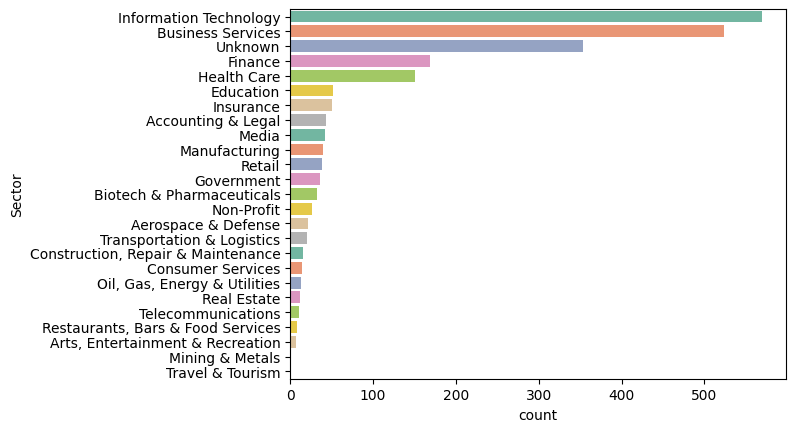

In [357]:
graf_conteo_de_valores(df,'Sector',save_image_dir=directorio_de_imagenes,save_image_file='Sector_1')

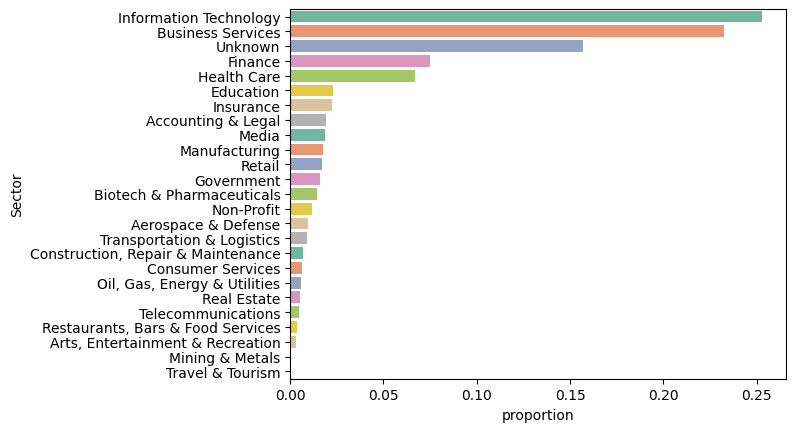

In [358]:
graf_conteo_de_valores(df,'Sector',normalize=True,save_image_dir=directorio_de_imagenes,save_image_file='Sector_1')

# Revenue

In [244]:
df['Revenue'].value_counts()

Revenue
Unknown / Non-Applicable            615
$100 to $500 million (USD)          218
$50 to $100 million (USD)           199
$10+ billion (USD)                  189
-1                                  163
$10 to $25 million (USD)            132
$2 to $5 billion (USD)              129
$1 to $5 million (USD)              111
$25 to $50 million (USD)            110
Less than $1 million (USD)           93
$1 to $2 billion (USD)               87
$500 million to $1 billion (USD)     79
$5 to $10 million (USD)              72
$5 to $10 billion (USD)              56
Name: count, dtype: int64

In [245]:
df.loc[(df['Revenue']=="-1"), 'Revenue']='Unknown / Non-Applicable'

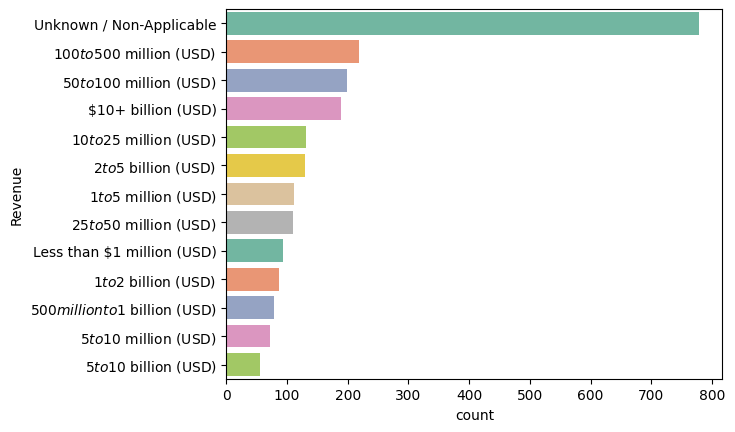

In [359]:
graf_conteo_de_valores(df,'Revenue',save_image_dir=directorio_de_imagenes,save_image_file='Revenue_1')

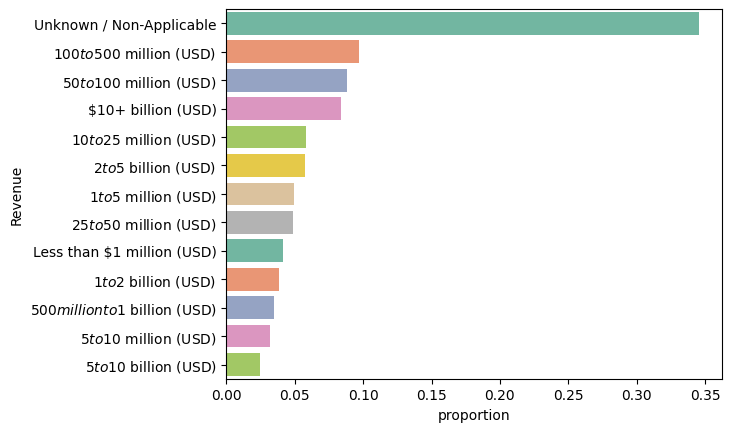

In [361]:
graf_conteo_de_valores(df,'Revenue',normalize=True,save_image_dir=directorio_de_imagenes,save_image_file='Revenue_1')

# Competitors
- Tiene demasiados valores desconocidos por lo que se removera esta columna

In [247]:
df['Competitors'].value_counts()

Competitors
-1                                                                 1732
Robert Half, Insight Global                                          14
Adecco, Manpower                                                     14
Artech Information Systems, Mindlance, Tech Mahindra                 10
Google, Microsoft, Samsung Electronics                               10
                                                                   ... 
Carr Riggs & Ingram, Cherry Bekaert, LBMC                             1
Transnational Foods, One Source Distributors                          1
GE                                                                    1
Fiserv, First Data, Jack Henry & Associates                           1
Centura Health, HealthONE, Denver Health and Hospital Authority       1
Name: count, Length: 291, dtype: int64

In [248]:
df.loc[(df['Competitors']=="-1"), 'Competitors']='Unknown'

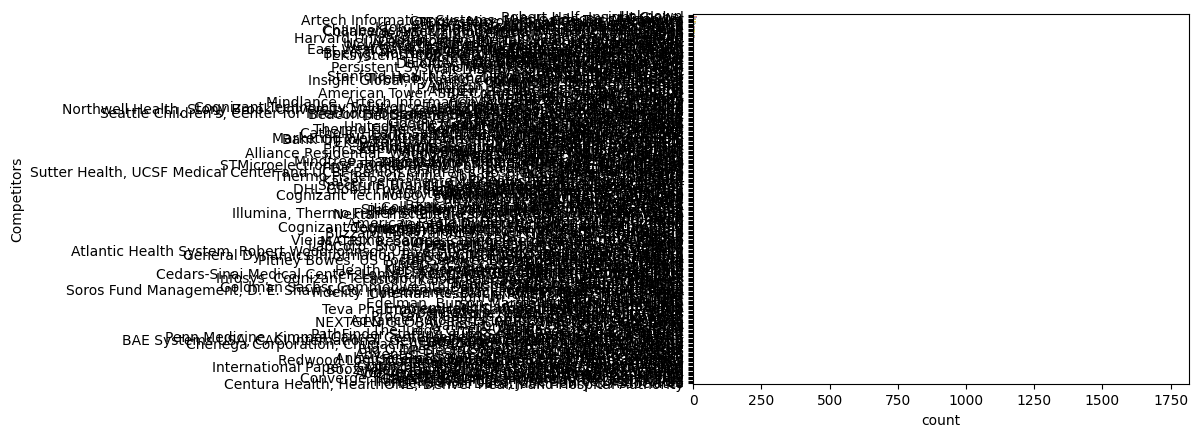

In [249]:
graf_conteo_de_valores(df,'Competitors')

In [250]:
competitors_value_counts= getDataFrameValueCounts(df,'Competitors')
competitors_value_counts

,Competitors,count
0,Unknown,1732
1,"Robert Half, Insight Global",14
2,"Adecco, Manpower",14
3,"Artech Information Systems, Mindlance, Tech Ma...",10
4,"Google, Microsoft, Samsung Electronics",10
...,...,...
286,"Carr Riggs & Ingram, Cherry Bekaert, LBMC",1
287,"Transnational Foods, One Source Distributors",1
288,GE,1
289,"Fiserv, First Data, Jack Henry & Associates",1


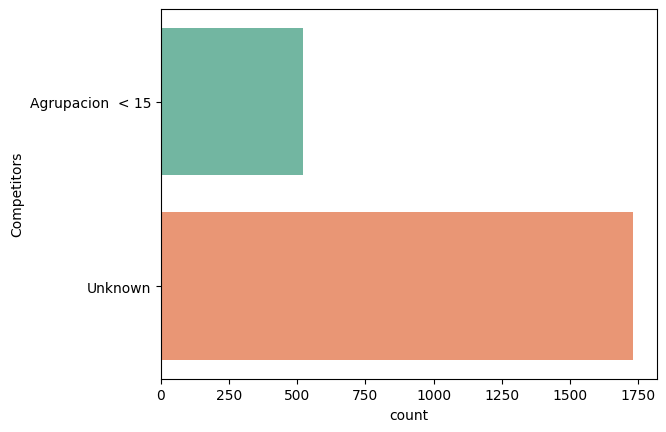

In [362]:
graf_conteo_de_valores_grupados(df,'Competitors',15,"Agrupacion  < 15",save_image_dir=directorio_de_imagenes,save_image_file='Competitors_1')

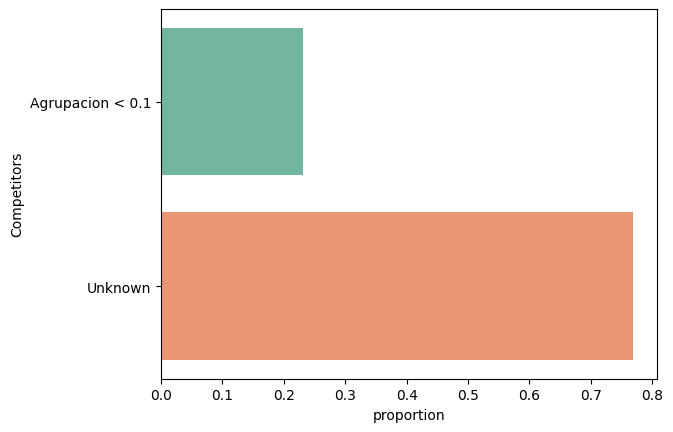

In [363]:
graf_conteo_de_valores_grupados(df,'Competitors',0.1,"Agrupacion < 0.1",normalize=True,save_image_dir=directorio_de_imagenes,save_image_file='Competitors_1')

In [252]:
#del df['Competitors']

# Easy Apply
- Tiene demasiados valores desconocidos y solo unos cuantos con informacion por lo que esta columna se removera

In [253]:

df['Easy Apply'].value_counts()

Easy Apply
-1      2173
True      80
Name: count, dtype: int64

In [254]:
df.loc[(df['Easy Apply']=="-1"), 'Easy Apply']='Unknown'

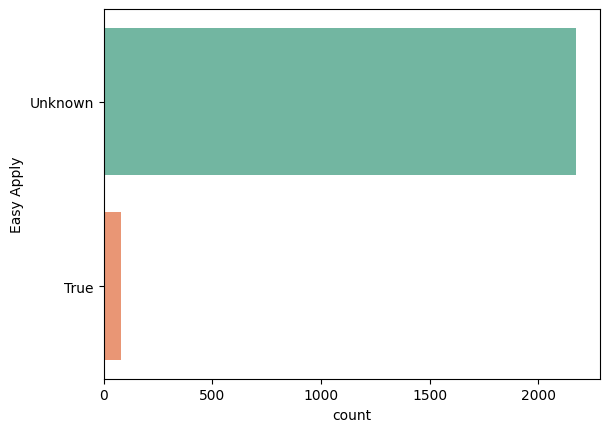

In [365]:
graf_conteo_de_valores(df,'Easy Apply',save_image_dir=directorio_de_imagenes,save_image_file='Easy_Apply_1')

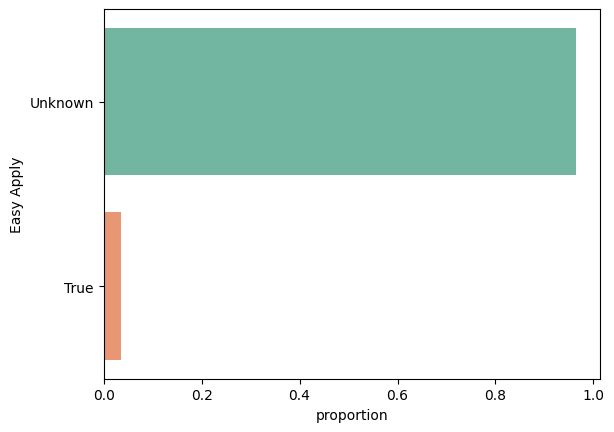

In [366]:
graf_conteo_de_valores(df,'Easy Apply',normalize=True,save_image_dir=directorio_de_imagenes,save_image_file='Easy_Apply_1')

In [256]:
#del df['Easy Apply']